In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/sample_data/penguins_size.csv')
df = df.dropna()

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [7]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_features = 'sqrt', random_state = 101)

max_features = {'sqrt', 'log2'}

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
predictions = rf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        49
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      1.00      1.00        42

    accuracy                           0.99       111
   macro avg       0.98      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111



In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, predictions)

0.990990990990991

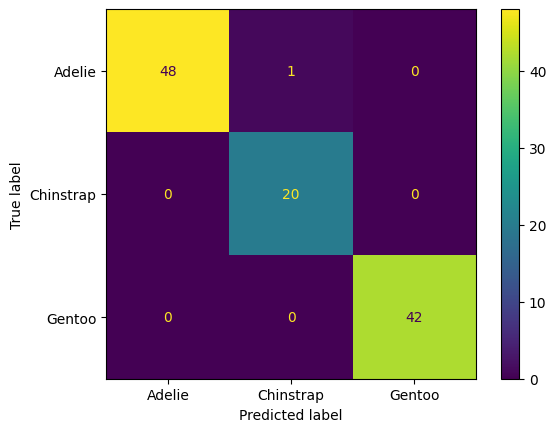

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
cmplot = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
cmplot.plot();

Only one instance is predicted wrong as Chinstrap but that was Adelie in real.

In [19]:
rf.feature_importances_

array([0.26788223, 0.11253091, 0.1822328 , 0.22612868, 0.16007366,
       0.04522294, 0.00341658, 0.00251219])

In [20]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_FEMALE',
       'sex_MALE'],
      dtype='object')

In [27]:
pd.DataFrame(index=X.columns, data=rf.feature_importances_, columns=['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

,Feature Importance
culmen_length_mm,0.267882
body_mass_g,0.226129
flipper_length_mm,0.182233
island_Dream,0.160074
culmen_depth_mm,0.112531
island_Torgersen,0.045223
sex_FEMALE,0.003417
sex_MALE,0.002512
